In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_csv(r"D:\SEM 5\ML\train.csv\train.csv")
test = pd.read_csv(r"D:\SEM 5\ML\test.csv\test.csv")


In [31]:
X = train.drop(columns=['id', 'price'])
y = train['price']
X_test = test.drop(columns=['id'])


In [32]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()


In [33]:
for col in categorical_cols:
    X[col] = X[col].astype(str)
    X_test[col] = X_test[col].astype(str)

In [34]:
# Ordinal encoding
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(X[categorical_cols])
X[categorical_cols] = encoder.transform(X[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])


In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
y_val_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {rmse:.2f}")

Validation RMSE: 73225.64


In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred = np.where(y_pred < 0, 0, y_pred)


In [40]:
submission = pd.DataFrame({
    'id': test['id'],
    'price': y_pred
})

submission.to_csv(r"D:\submission.csv", index=False)
print("✅ Submission saved to D:\\submission.csv")

✅ Submission saved to D:\submission.csv


✅ RMSE on Validation: 73225.64


C:\Users\akiti\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


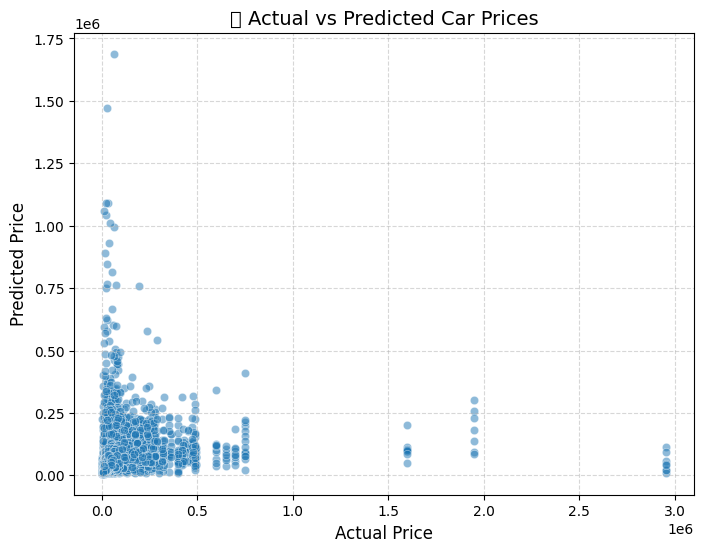

C:\Users\akiti\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


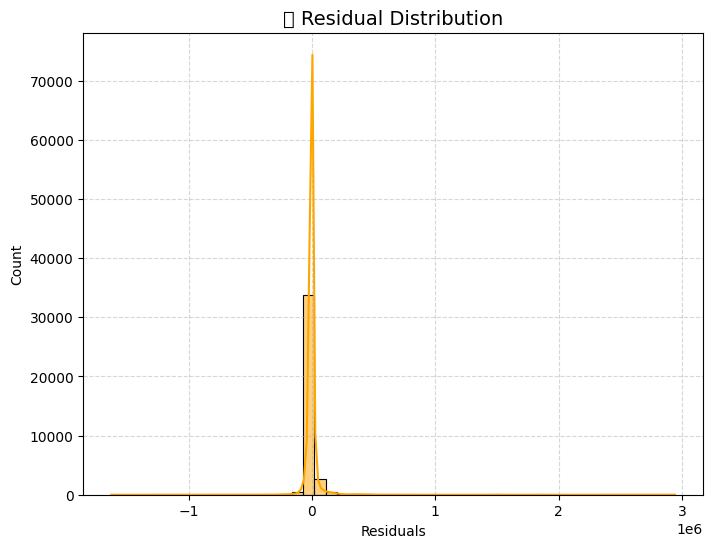

C:\Users\akiti\AppData\Local\Temp\ipykernel_4928\1981056073.py:83: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akiti\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


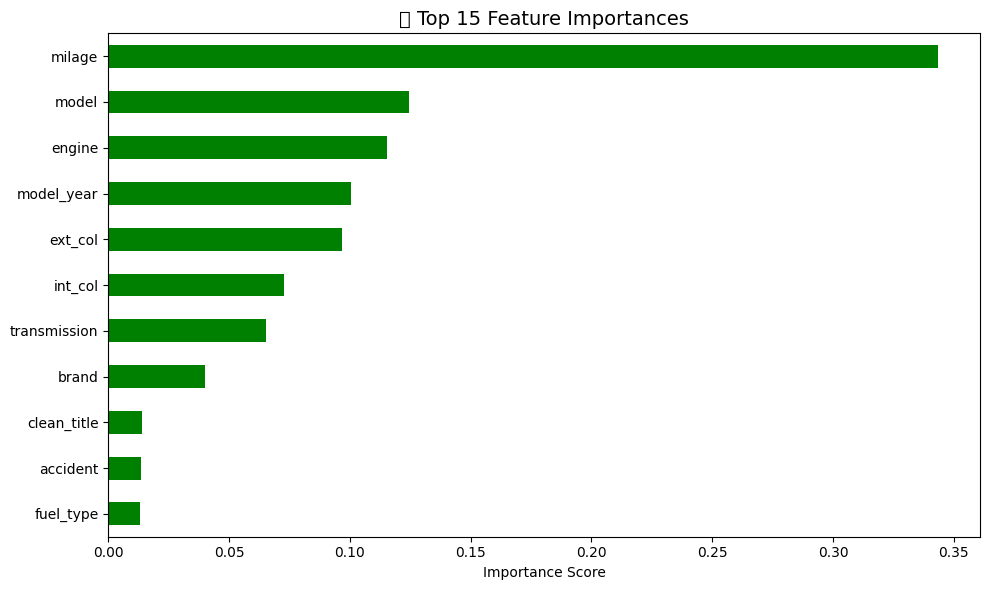

In [9]:
# ============================================
# 📌 1. Import Libraries
# ============================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# 📌 2. Load Dataset
# ============================================
train = pd.read_csv(r"D:\SEM 5\ML\train.csv\train.csv")
test = pd.read_csv(r"D:\SEM 5\ML\test.csv\test.csv")

# Separate target and features
y = train['price']
X = train.drop(['price', 'id'], axis=1)
X_test = test.drop(['id'], axis=1)

# ============================================
# 📌 3. Preprocessing
# ============================================
categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = X[categorical_cols].astype(str)
X_test[categorical_cols] = X_test[categorical_cols].astype(str)

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])

# ============================================
# 📌 4. Train-Test Split for Validation
# ============================================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================
# 📌 5. Train Model
# ============================================
model = RandomForestRegressor(n_estimators=200, max_depth=15, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Predict on validation
y_val_pred = model.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"✅ RMSE on Validation: {rmse:.2f}")

# ============================================
# 📊 6. Visualization
# ============================================

# 1️⃣ Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.5)
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.title("📈 Actual vs Predicted Car Prices", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 2️⃣ Residual Plot
residuals = y_val - y_val_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True, color='orange')
plt.xlabel("Residuals")
plt.title("📊 Residual Distribution", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 3️⃣ Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
importances.sort_values(ascending=True).tail(15).plot(kind='barh', color='green')
plt.title("🔥 Top 15 Feature Importances", fontsize=14)
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
